In [1]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

In [47]:
from empiricaldist import FreqTab, Pmf
import numpy as np
import pandas as pd
from thinkstats import two_bar_plots, decorate
from nsfg import get_nsfg_groups
import matplotlib.pyplot as plt

In [3]:
df = FreqTab.from_seq([1, 2, 2, 3, 5])
df

,freqs
1,1
2,2
3,1
5,1


In [4]:
n = df.sum()
n 

np.int64(5)

In [5]:
pmf = df / n
pmf

,probs
1,0.2
2,0.4
3,0.2
5,0.2


In [6]:
pmf.sum()

np.float64(1.0)

In [7]:
pmf = Pmf.from_seq([1, 2, 2, 3, 5])
pmf

,probs
1,0.2
2,0.4
3,0.2
5,0.2


In [8]:
pmf.sum()

np.float64(1.0)

In [9]:
pmf[2]

np.float64(0.4)

In [10]:
pmf(2)

np.float64(0.4)

In [11]:
pmf[2] = 0.2
pmf(2)

np.float64(0.2)

In [12]:
pmf[2] += 0.3
pmf(2)

np.float64(0.5)

In [13]:
pmf[2] *= 0.5
pmf(2)

np.float64(0.25)

In [14]:
pmf.sum()

np.float64(0.8500000000000001)

In [15]:
pmf.normalize()

np.float64(0.8500000000000001)

In [16]:
pmf.sum()

np.float64(1.0)

In [17]:
pmf

,probs
1,0.235294
2,0.294118
3,0.235294
5,0.235294


In [18]:
seq = [1, 2, 2, 3, 5]
n = len(seq)
mean = np.sum(seq) / n
mean

np.float64(2.6)

In [19]:
pmf = Pmf.from_seq(seq)
np.sum(pmf.ps * pmf.qs)
mean

np.float64(2.6)

In [20]:
pmf.mean()

np.float64(2.6)

In [21]:
deviations = pmf.qs - mean
deviations

array([-1.6, -0.6,  0.4,  2.4])

In [22]:
var = np.sum(pmf.ps * deviations ** 2)
var

np.float64(1.84)

In [23]:
pmf.var()

np.float64(1.84)

In [24]:
np.sqrt(var)

np.float64(1.3564659966250536)

In [25]:
pmf.std()

np.float64(1.3564659966250536)

In [26]:
pmf.mode()

np.int64(2)

In [27]:
ranges = pd.interval_range(start = 5, end = 50, freq = 5, closed = "left")
ranges.name = "class size"
df = pd.DataFrame(index = ranges)
df["count"] = [8,8,14,4,6,12,8,3,2]
df

,count
class size,
"[5, 10)",8
"[10, 15)",8
"[15, 20)",14
"[20, 25)",4
"[25, 30)",6
"[30, 35)",12
"[35, 40)",8
"[40, 45)",3
"[45, 50)",2


In [28]:
sizes = ranges.left + 2
sizes

Index([7, 12, 17, 22, 27, 32, 37, 42, 47], dtype='int64')

In [29]:
counts = df['count']
actual_pmf = Pmf(counts, sizes, name = "actual")
actual_pmf.normalize()

np.int64(65)

In [30]:
actual_pmf.mean()

np.float64(23.692307692307693)

In [31]:
def bias(pmf, name):
    ps = pmf.ps * pmf.qs
    new_pmf = Pmf(ps, pmf.qs, name = name)
    new_pmf.normalize()
    return new_pmf

In [32]:
observed_pmf = bias(actual_pmf, name = "Observed")

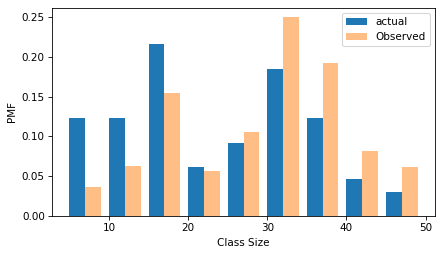

In [33]:
two_bar_plots(actual_pmf, observed_pmf, width = 2)
decorate(xlabel = "Class Size", ylabel = "PMF")

In [34]:
observed_pmf.mean()

np.float64(29.123376623376622)

In [35]:
def unbias(pmf, name):
    ps = pmf.ps / pmf.qs
    new_pmf = Pmf(ps, pmf.qs, name = name)
    new_pmf.normalize()
    return new_pmf

In [36]:
debiased_pmf = unbias(observed_pmf, "debiased")
debiased_pmf.mean()

np.float64(23.692307692307693)

In [38]:
live, firsts, others = get_nsfg_groups()
first_pmf = Pmf.from_seq(firsts["prglngth"], name = "firsts")
other_pmf = Pmf.from_seq(others["prglngth"], name = "others")

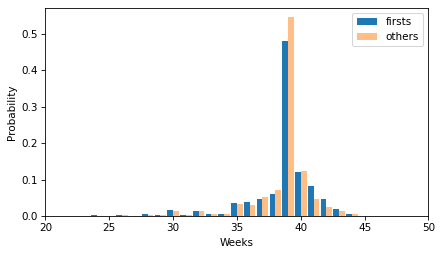

In [39]:
two_bar_plots(first_pmf, other_pmf)
decorate(xlabel = "Weeks", ylabel = "Probability", xlim = [20,50])

In [40]:
weeks = range(35, 46)
first_pmf(weeks)

array([0.03602991, 0.03897575, 0.04713347, 0.06163608, 0.4790392 ,
       0.12145932, 0.08157716, 0.04645366, 0.01971448, 0.00521187,
       0.00135962])

In [41]:
other_pmf(weeks)

array([0.03210137, 0.03146779, 0.05216473, 0.07074974, 0.54466737,
       0.12249208, 0.04794087, 0.02597677, 0.01288279, 0.00485744,
       0.00084477])

In [43]:
diffs = first_pmf(weeks) - other_pmf(weeks)
diffs

array([ 0.00392854,  0.00750796, -0.00503126, -0.00911366, -0.06562817,
       -0.00103276,  0.03363629,  0.02047689,  0.00683169,  0.00035443,
        0.00051485])

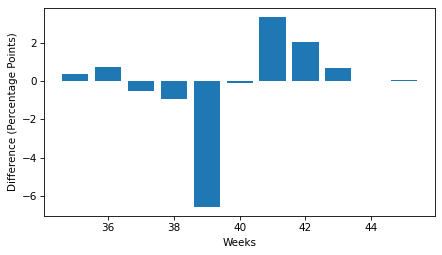

In [48]:
plt.bar(weeks, diffs * 100)
decorate(xlabel = "Weeks", ylabel = "Difference (Percentage Points)")